# Image Thresholding

## Simple Thresholding

The function "cv2.threshold" in Python is used to perform image thresholding, a common technique in image processing. Here's a refined description of the function {cite:p}`opencv_library, OpenCVDocumentation`:

```
cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
```

This function takes an input image (src) and applies a thresholding operation to it, producing a binary image. The thresholding operation involves comparing each pixel value in the source image to a specified threshold value (thresh). Pixels with values greater than or equal to the threshold are set to a specified maximum value (maxval), while pixels with values less than the threshold are set to zero (or a minimum value, depending on the type of thresholding specified). The resulting binary image is returned as the destination image (dst).

The function also returns two values: "retval," which is the threshold value used (this can be useful in adaptive thresholding), and "dst," the resulting thresholded image.

The "type" parameter determines the type of thresholding to be applied, and it can take one of the following values:
- cv2.THRESH_BINARY: Binary thresholding, where pixels above the threshold are set to maxval, and pixels below are set to zero.
- cv2.THRESH_BINARY_INV: Inverse binary thresholding, where pixels above the threshold are set to zero, and pixels below are set to maxval.
- cv2.THRESH_TRUNC: Truncated thresholding, where pixels above the threshold are set to the threshold value, and pixels below remain unchanged.
- cv2.THRESH_TOZERO: Thresholding to zero, where pixels above the threshold remain unchanged, and pixels below are set to zero.
- cv2.THRESH_TOZERO_INV: Inverse thresholding to zero, where pixels above the threshold are set to zero, and pixels below remain unchanged.

The optional "dst" parameter allows you to provide a pre-allocated output image to store the thresholded result. This parameter is useful when you want to reuse an existing image buffer instead of creating a new one.

`````{admonition} Remark
:class: important

The function performs fixed-level thresholding on a single-channel array. It is primarily employed to obtain a binary image from a grayscale one (you can also achieve this using `compare()`) or to eliminate noise by filtering out pixels with values that are either too small or too large. The function offers various thresholding types, which are specified by the 'type' parameter.

`````

In [1]:
import matplotlib.pyplot as plt
import cv2

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

### Binary Thresholding Image Transformation

In the context of image processing, "THRESH_BINARY" is a thresholding technique used to convert a grayscale image into a binary image. Here's how it works:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than a specified threshold value, the corresponding pixel in the output binary image is set to the maximum value (usually 255).
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output binary image is set to the minimum value (usually 0).

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{Maximum Value} & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
0 & \text{otherwise}
\end{cases}
\end{equation} 

This process effectively creates a binary image where pixels are classified into two categories based on their intensity: those above the threshold are set to the maximum value, and those below or equal to the threshold are set to the minimum value. This technique is commonly used for tasks such as object segmentation and feature extraction in computer vision and image analysis.

For more detailed information and examples, you can refer to the [OpenCV documentation on thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Binary Thresholding Image Transformation</b></font>:

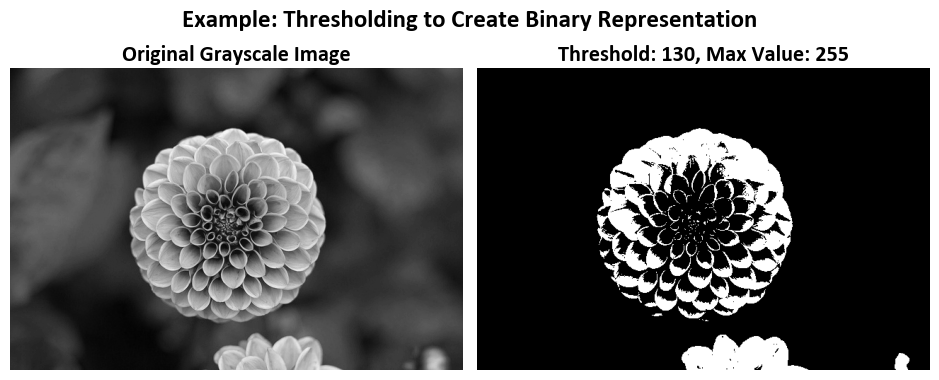

In [40]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply a binary threshold to the "Img" image
# The threshold value is set to 130, and the maximum value after thresholding is 255
# The result is stored in the "Out" image
_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY)

# Show both the original grayscale "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                 title='Example: Thresholding to Create Binary Representation', grayscale=True)

Let's break down the main step of the code:

`_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY)`: This line applies binary thresholding to the grayscale image `Img`. Thresholding is a process that converts a grayscale image into a binary image, where pixel values are either 0 (black) or 255 (white) based on a specified threshold. In this case:
   - The threshold value is set to 130.
   - The maximum value after thresholding is 255.
   - The result is stored in the `Out` image.

### THRESH_BINARY_INV Thresholding

"THRESH_BINARY_INV" is a thresholding technique used in image processing to create a binary image from a grayscale image. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output binary image is set to 0 (usually 0).
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output binary image is set to the maximum value (often 255).

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
0 & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
\text{Maximum Value} & \text{otherwise}
\end{cases}
\end{equation}

In simple words, "THRESH_BINARY_INV" inverts the behavior of "THRESH_BINARY." It results in a binary image where pixels above the threshold become black, and pixels equal to or below the threshold become white. This thresholding technique is useful in various image processing tasks, such as object segmentation and feature extraction, where objects of interest are typically darker than their background.

For a complete description of this technique and its usage, you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Inverse Binary Thresholding Image Transformation</b></font>:

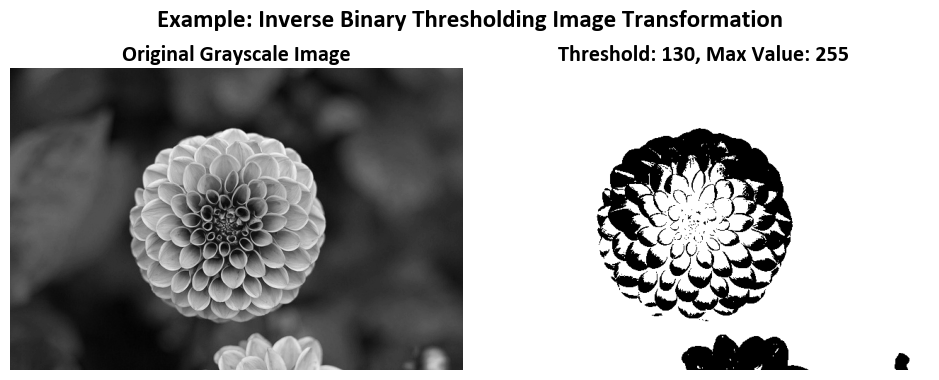

In [42]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply an inverse binary threshold to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The specific thresholding type used is cv2.THRESH_BINARY_INV
# The result is stored in the "Out" image
_, Out = cv2.threshold(Img, 130, 255, cv2.THRESH_BINARY_INV)

# Show both the original grayscale "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                 title='Example: Inverse Binary Thresholding Image Transformation', grayscale= True)

Let's break down the main step of the code:

An inverse binary thresholding operation is applied to the `Img` image using `cv2.threshold`. The key points in this step are:
   - The threshold value is set to 130.
   - The maximum value after thresholding is set to 255.
   - The thresholding type used is `cv2.THRESH_BINARY_INV`, which means that pixels above the threshold become black, and pixels below or equal to the threshold become white. This creates a binary representation where dark regions correspond to areas above the threshold.

### Truncate thresholding Thresholding

"THRESH_TRUNC" is a thresholding technique used in image processing to modify pixel values in a grayscale image based on a specified threshold value. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output image is set to the threshold value itself.
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output image retains its original intensity value from the source image.

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{Threshold Value} & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
\text{source}(x, y) & \text{otherwise}
\end{cases}
\end{equation}

In simpler terms, "THRESH_TRUNC" modifies the pixel values such that any value in the source image above the threshold value is replaced with the threshold value, while values at or below the threshold remain unchanged. This thresholding technique can be used for various image enhancement and adjustment tasks in image processing.

For a comprehensive description and examples of "THRESH_TRUNC," you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Truncate thresholding Image Transformation</b></font>:

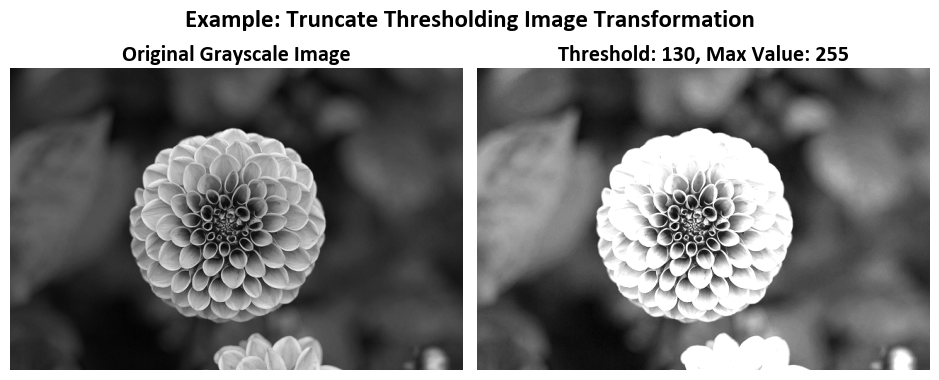

In [57]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The thresholding type used is cv2.THRESH_TRUNC
# The result is stored in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TRUNC)

# Show both the original grayscale "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                 title='Example: Truncate Thresholding Image Transformation', grayscale= True)

Let's break down the main step of the code:

Apply Thresholding Operation (THRESH_TRUNC):
   - The thresholding operation is applied to the `Img` image (original grayscale image) using the `cv2.threshold` function.
   - The threshold value is set to 130. This means that any pixel with an intensity value greater than 130 will retain its original intensity in the output, while pixels with values less than or equal to 130 will be set to a value equal to the threshold value (in this case, 130).
   - The `maxval` parameter is set to 255, which means that pixels exceeding the threshold will have a value of 255 (white).
   - The specific thresholding type used here is `cv2.THRESH_TRUNC`, which means that values exceeding the threshold are truncated to the threshold value (130).

### To-Zero Thresholding

"THRESH_TOZERO" is a thresholding technique used in image processing to modify pixel values in a grayscale image based on a specified threshold value. In this technique:

- For each pixel at position `(x, y)` in the source grayscale image:
  - If the pixel's intensity value at `(x, y)` is greater than the specified threshold value, the corresponding pixel in the output image retains its original intensity value from the source image.
  - If the pixel's intensity value at `(x, y)` is less than or equal to the threshold value, the corresponding pixel in the output image is set to 0.

In mathematical terms, this can be expressed as:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
\text{source}(x, y) & \text{if } \text{source}(x, y) > \text{Threshold Value} \\
0 & \text{otherwise}
\end{cases}
\end{equation}


In simpler terms, "THRESH_TOZERO" modifies the pixel values such that any value in the source image above the threshold value is preserved as is, while values at or below the threshold are set to 0. This thresholding technique can be used for various image processing tasks, such as emphasizing regions of interest or reducing noise in images.

For a comprehensive description and examples of "THRESH_TOZERO," you can refer to the OpenCV documentation on [thresholding](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - To-Zero thresholding Image Transformation</b></font>:

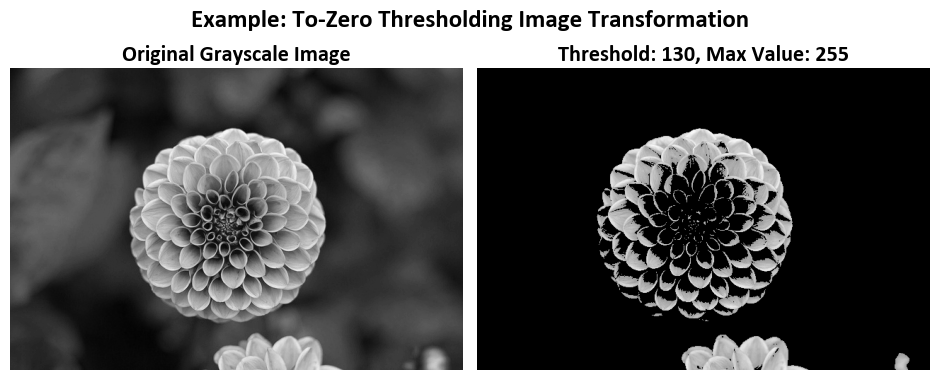

In [59]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# The threshold value is set to 130
# The maximum value after thresholding is set to 255
# The thresholding type used is cv2.THRESH_TOZERO
# The result is stored in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO)

# Show both the original grayscale "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Grayscale Image', 'Threshold: 130, Max Value: 255'],
                 title='Example: To-Zero Thresholding Image Transformation', grayscale=True)


Let's break down the main step of the code:

Apply Thresholding Operation (THRESH_TOZERO):
   - The thresholding operation is applied to the `Img` image (original grayscale image) using the `cv2.threshold` function.
   - The threshold value is set to 130. This means that any pixel with an intensity value greater than 130 will retain its original intensity in the output, while pixels with values less than or equal to 130 will be set to 0 (black).
   - The `maxval` parameter is set to 255, which means that pixels exceeding the threshold will have a value of 255 (white).
   - The specific thresholding type used here is `cv2.THRESH_TOZERO`, which means that values below the threshold will be set to 0 (black).

### Inverse To-Zero Thresholding

The `cv2.THRESH_TOZERO_INV` thresholding operation is a method used in image processing to modify pixel values in a grayscale image based on a predefined threshold value. It is part of the OpenCV library, a powerful tool for computer vision tasks. This specific thresholding operation follows the formula:

\begin{equation}
\text{Output}(x, y) = \begin{cases}
0 & \text{if } \text{source}(x, y) > \text{threshold value} \\
\text{source}(x, y) & \text{otherwise}
\end{cases}
\end{equation}

- For each pixel in the source image, if its intensity value (brightness) is greater than the specified threshold value, it is set to 0 in the output image.
- Conversely, if the pixel's intensity is equal to or less than the threshold value, it retains its original intensity in the output image.

This thresholding technique is particularly useful for enhancing certain features or removing noise in images where pixel values above a certain threshold are considered significant. Pixels below the threshold remain unchanged, while those above it are set to zero.

For more detailed information and examples of using `cv2.THRESH_TOZERO_INV`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#threshold).

<font color='Blue'><b>Example - Inverse Inverse To-Zero thresholding Image Transformation</b></font>:

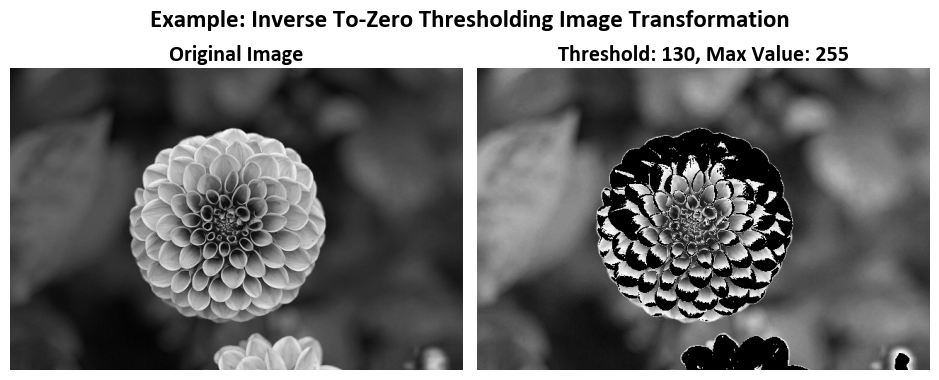

In [58]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply a thresholding operation to the "Img" image
# Set the threshold value to 130
# Set the maximum value after thresholding to 255
# Use cv2.THRESH_TOZERO_INV as the thresholding type
# Store the result in the "Out" image
_ , Out = cv2.threshold(Img, thresh=130, maxval=255, type=cv2.THRESH_TOZERO_INV)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
fig, ax = ImShow([Img, Out], ['Original Image', 'Threshold: 130, Max Value: 255'],
                 title='Example: Inverse To-Zero Thresholding Image Transformation', grayscale=True)


Let's break down the main step of the code:

Apply Thresholding: The thresholding operation is applied to the `Img` image using the `cv2.threshold` function. Here's what each parameter does:
   - `Img`: The input image.
   - `thresh`: The threshold value is set to 130. This means that any pixel value in the input image greater than 130 will be changed.
   - `maxval`: The maximum value after thresholding is set to 255. This means that pixel values greater than 130 will be set to 255.
   - `type`: `cv2.THRESH_TOZERO_INV` is used as the thresholding type. This type sets pixels to zero if their values are greater than the threshold and leaves them unchanged if they are less than or equal to the threshold.

## AdaptiveThresholding

The function "cv2.adaptiveThreshold" in Python is a part of the OpenCV library, which is used for image processing. It performs adaptive thresholding on a source image, producing a binary (grayscale) image based on the local properties of the input image. The refined description of the function is as follows:

```
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst
```

**Parameters:**

1. `src`: Input image (single-channel, 8-bit or 32-bit floating point).
2. `maxValue`: The maximum value to assign to pixels that pass the adaptive thresholding. Typically set to 255 for binary images.
3. `adaptiveMethod`: Method used to calculate the threshold value for each pixel. It can take one of the following values:
   - `cv2.ADAPTIVE_THRESH_MEAN_C`: Threshold value is the mean of the neighborhood area.
   - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: Threshold value is the weighted sum of neighborhood values where weights are a Gaussian window.
4. `thresholdType`: Type of thresholding to apply. It can take one of the following values:
   - `cv2.THRESH_BINARY`: Pixels with values greater than the calculated threshold are set to `maxValue`, and pixels below are set to 0.
   - `cv2.THRESH_BINARY_INV`: Inverse binary thresholding, where pixels above the threshold are set to 0, and pixels below are set to `maxValue`.
5. `blockSize`: Size of the neighborhood area (odd number, typically 3, 5, 7, etc.). The threshold is calculated based on the pixel values within this local region.
6. `C`: Constant subtracted from the mean (or weighted mean, in case of Gaussian) to calculate the final threshold value. It allows adjusting the sensitivity of the thresholding.
7. `dst` (optional): Destination image where the result will be stored. If not provided, a new image will be created.

**Returns:**

The output image (`dst`) after applying the adaptive thresholding.

**Usage:**

This function is useful for segmenting an image into regions of interest, separating objects from the background, or enhancing features in images with varying lighting conditions. The adaptive thresholding method helps handle variations in local image intensity, making it particularly useful for images with uneven illumination.

`````{admonition} Remark
:class: important

The main difference between `cv2.threshold` and `cv2.adaptiveThreshold` in OpenCV lies in how they determine the threshold values for converting a grayscale image into a binary image.

1. **cv2.threshold:**
   - In `cv2.threshold`, you specify a single global threshold value (an integer) that is applied uniformly to all pixels in the image. This means that the same threshold value is used for every pixel in the image.
   - Pixels with intensity values greater than the specified threshold value are set to a maximum value (often 255), and pixels with values less than or equal to the threshold value are set to 0.

   ```python
   _, binary_image = cv2.threshold(src, threshold_value, max_value, cv2.THRESH_BINARY)
   ```

2. **cv2.adaptiveThreshold:**
   - In `cv2.adaptiveThreshold`, the threshold value is calculated individually for each pixel based on the local neighborhood of that pixel. This allows for adaptive thresholding, where the threshold value can vary across different regions of the image.
   - You need to specify two additional parameters: `blockSize` (the size of the local neighborhood for calculating the threshold) and `C` (a constant subtracted from the mean or weighted mean, depending on the method chosen). These parameters control the adaptiveness of the thresholding.
   - `cv2.adaptiveThreshold` supports two adaptive thresholding methods:
     - `cv2.ADAPTIVE_THRESH_MEAN_C`: The threshold value for each pixel is the mean of the pixel values in its local neighborhood.
     - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value for each pixel is the weighted sum of pixel values in its local neighborhood, with weights determined by a Gaussian window.

   ```python
   binary_image = cv2.adaptiveThreshold(src, max_value, adaptiveMethod, thresholdType, blockSize, C)
   ```
`````

### Binary Thresholding Image Transformation

In the context of image thresholding, the `cv2.THRESH_BINARY` method is a fundamental technique used to create binary images from grayscale ones. The core idea can be expressed as follows:

\begin{equation}
\text{Output }(x,y) = \begin{cases}\text{maximum value}&\mbox{if source(x,y)} > T(x,y),\\0,&\mbox{otherwise}\end{cases}
\end{equation} 

For more detailed information, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#adaptivethreshold).

<font color='Blue'><b>Example - Binary Thresholding Image Transformation</b></font>:

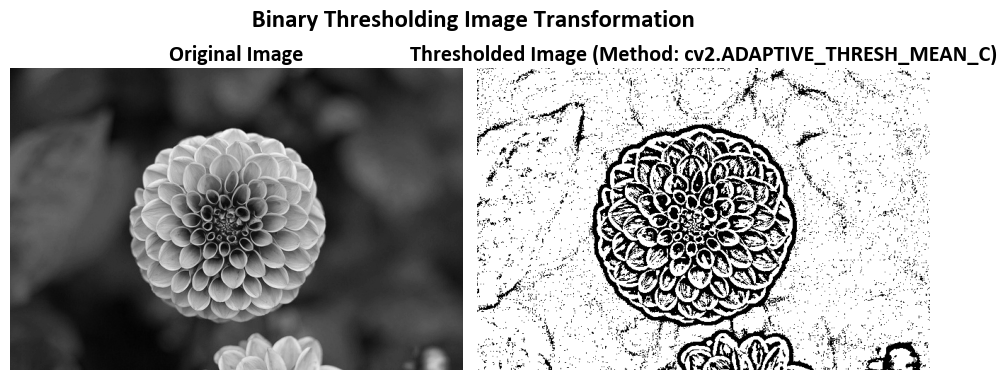

In [62]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply adaptive thresholding to the "Img" image
# Set the maximum value after thresholding to 255
# Use cv2.ADAPTIVE_THRESH_MEAN_C as the adaptive method
# Use cv2.THRESH_BINARY as the threshold type
# Set the block size for local thresholding to 11x11
# Set the constant subtracted from the mean to 2
Out = cv2.adaptiveThreshold(Img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
# Assuming that the "ImShow" function is defined elsewhere
fig, ax = ImShow([Img, Out], ['Original Image', 'Thresholded Image (Method: cv2.ADAPTIVE_THRESH_MEAN_C)'],
                 title='Binary Thresholding Image Transformation', grayscale=True)


Let's break down the main step of the code:

Applying adaptive thresholding:
   - `Out = cv2.adaptiveThreshold(Img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)`: This line applies adaptive thresholding to the `Img` grayscale image using the `cv2.adaptiveThreshold` function.
     - `Img` is the source image.
     - `255` is the maximum value assigned to pixels that pass the threshold, which is used to create a binary image.
     - `cv2.ADAPTIVE_THRESH_MEAN_C` specifies the adaptive thresholding method, which calculates the threshold value as the mean of the local neighborhood area.
     - `cv2.THRESH_BINARY` sets the threshold type, indicating that pixels above the threshold become white (255), while those below become black (0).
     - `11` is the block size, defining the size of the local neighborhood area for threshold calculation. It is set to 11x11 pixels.
     - `2` is the constant subtracted from the mean to adjust the sensitivity of the thresholding.

### Inverse Binary Thresholding Image Transformation

\begin{equation}
\text{Output }(x,y) = \begin{cases}0&\mbox{if source(x,y)} > T(x,y),\\\text{maximum value},&\mbox{otherwise}\end{cases}
\end{equation} 

For more detailed information, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#adaptivethreshold).

<font color='Blue'><b>Example - Inverse Binary Thresholding Image Transformation</b></font>:

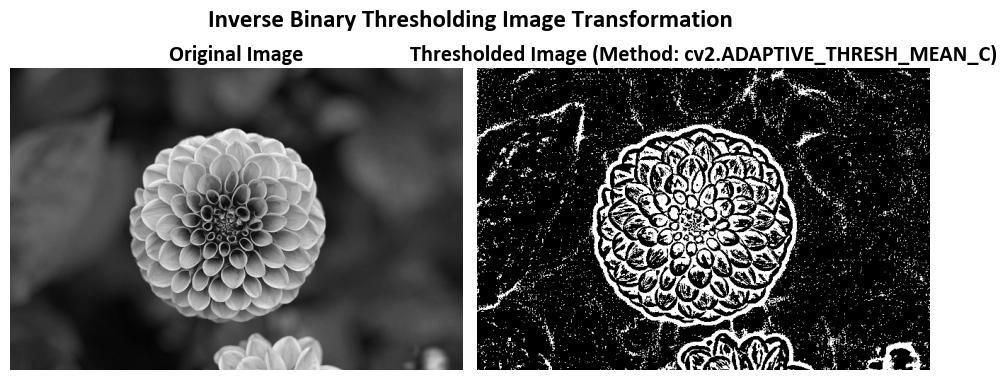

In [65]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example color image
Img = load_sample_image('flower.jpg')

# Convert the color image to grayscale
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Create a copy of the grayscale image
Out = Img.copy()

# Apply adaptive thresholding to the "Img" image with an inverted binary threshold
Out = cv2.adaptiveThreshold(Img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Show both the original "Img" image and the thresholded "Out" image
# Add titles to the images for clarity
# Assuming that the "ImShow" function is defined elsewhere
fig, ax = ImShow([Img, Out], ['Original Image', 'Thresholded Image (Method: cv2.ADAPTIVE_THRESH_MEAN_C)'],
                 title='Inverse Binary Thresholding Image Transformation', grayscale=True)

Let's break down the main step of the code:

Adaptive Thresholding:
   - The main operation is adaptive thresholding, which is performed using the `cv2.adaptiveThreshold` function.
   - Parameters:
     - `Img`: The input grayscale image to be thresholded.
     - `255`: The maximum pixel value assigned to pixels that pass the threshold.
     - `cv2.ADAPTIVE_THRESH_MEAN_C`: This specifies the adaptive method, where the threshold value is calculated as the mean of the neighborhood area.
     - `cv2.THRESH_BINARY_INV`: The type of thresholding applied. In this case, it's an inverted binary threshold, meaning pixels above the threshold are set to 0, and pixels below are set to the maximum value (255).
     - `11`: The size of the neighborhood area for calculating the threshold. It's an 11x11 pixel area.
     - `2`: A constant subtracted from the mean to adjust the threshold value's sensitivity.